<a href="https://colab.research.google.com/github/juliocnsouzadev/notebooks/blob/8-boston-housing-with-tensorflow/Boston_Pricing_Tensorflow_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Princing Dataset 🏠 💸

In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

### Reading Data 👓

In [3]:
from sklearn.datasets import load_boston
dataset = load_boston()
boston_dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston_dataset["MEDV"] = dataset.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Columns
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000

- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of (people of African American descent) by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

### Creating Features and Labels 🏷

In [6]:
X = boston_dataset.drop("MEDV", axis=1)
y = boston_dataset["MEDV"]

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Creating training and test sets 🧪

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(506, 404, 102)

### Normalisation >>> CONTINUE HERE <<<

In [10]:
# Create a column tranformer

c_tranformer = make_column_transformer(
    # converting values into between 0 and 1
    (MinMaxScaler(), ["CRIM", "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
)

# Fit the column transformer to our training data
c_tranformer.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = c_tranformer.transform(X_train)
X_test_normal = c_tranformer.transform(X_test)
     

In [11]:
pd.DataFrame(X_train_normal).loc[0]

0     0.168763
1     0.000000
2     0.642963
3     0.000000
4     0.471193
5     0.293065
6     0.972194
7     0.088307
8     1.000000
9     0.914122
10    0.808511
11    0.880428
12    0.639625
Name: 0, dtype: float64

### Creating a Tensorflow Model ⭐

In [15]:
tf.random.set_seed(42)

deep_learning_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer-01-100"),
    tf.keras.layers.Dense(10, name="input_layer02-10"),
    tf.keras.layers.Dense(1, name="output_layer")
], 
name = "insurance-model-deep-learning-01")

deep_learning_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = deep_learning_model.fit(X_train_normal, y_train, epochs= 80, verbose= 0)

### Evaluating the Model 📐

In [16]:
deep_learning_model.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 3.1650 - mae: 3.1650


[3.164992094039917, 3.164992094039917]

Text(0.5, 0, 'epochs')

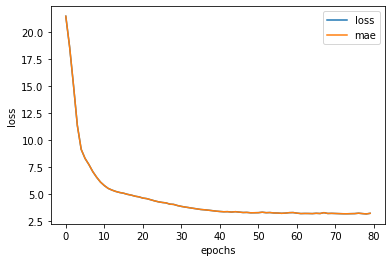

In [17]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Making Predictions 🌐

In [18]:
y_pred = deep_learning_model.predict(X_test_normal)
y_pred[0:5]


4/4 [==============================] - 0s 3ms/step


array([[26.131298],
       [32.103447],
       [15.721947],
       [23.903868],
       [18.366734]], dtype=float32)

### Visualising Predictions 👀

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

In [20]:
(X_train.to_numpy()[:,0].shape, y_train.to_numpy().shape)

((404,), (404,))

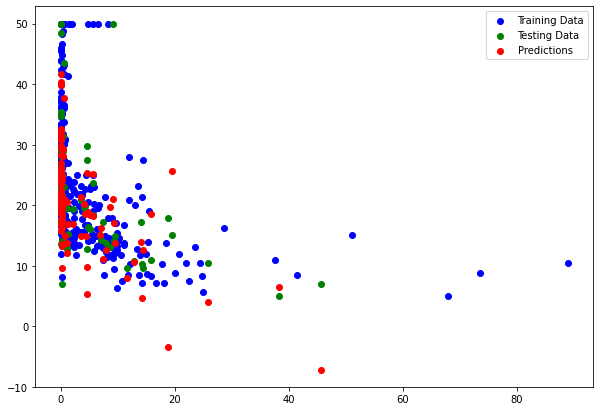

In [21]:
plot_predictions(
   X_train.to_numpy()[:,0],
   y_train.to_numpy(),
   X_test.to_numpy()[:,0],
   y_test.to_numpy(),
   y_pred
)